In [1]:
from sklearn.model_selection import KFold
from data_pre_processing.fetch_data import *
from sklearn.tree import DecisionTreeRegressor
from data_pre_processing.fill_missing_values import fill_ratings_with_mean_per_user
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
X, y = get_X_Y_train()
X, _ = fill_ratings_with_mean_per_user(X)
X = X[:,1,:] # only ratings
y = (y>3).astype(int) - (y<=3).astype(int)

In [3]:
X_train, y_train, X_validation, y_validation = random_partition(X, y, training_fraction=0.8)

n_train_samples = X_train.shape[0]
n_test_samples = X_validation.shape[0]

## AdaBoost

In [4]:
def misclassification_error(y_hat, y):
    return np.sum(~np.equal(np.sign(y_hat), np.sign(y))) / len(y)

weights = np.repeat(1, n_train_samples)

boosted_train_predictions = np.repeat(0, n_train_samples)
boosted_validation_predictions = np.repeat(0, n_test_samples)

train_misclassication_errors = []
validation_misclassication_errors = []

for t in range(1000):
    tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
    tree.fit(X_train, y_train, sample_weight=weights)
    y_hat_t = tree.predict(X_train)

    err_t = np.sum(weights[~np.equal(np.sign(y_hat_t), np.sign(y_train))]) / np.sum(weights)
    alpha_t = 0.5*np.log((1-err_t)/err_t)
    
    boosted_train_predictions = boosted_train_predictions + alpha_t*y_hat_t
    boosted_validation_predictions = boosted_validation_predictions + alpha_t*tree.predict(X_validation)
    
    weights = np.multiply(weights, np.exp(-alpha_t*np.multiply(y_hat_t, y_train)))
    weights = (weights / np.sum(weights))*n_train_samples

    train_misclassication_errors.append(misclassification_error(boosted_train_predictions, y_train))
    validation_misclassication_errors.append(misclassification_error(boosted_validation_predictions, y_validation))
    
    print("Train: ", train_misclassication_errors[-1], "Test: ", validation_misclassication_errors[-1])
    

Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.290875 Test:  0.2945
Train:  0.290875 Test:  0.2945
Train:  0.290875 Test:  0.293
Train:  0.2865 Test:  0.2945
Train:  0.289625 Test:  0.2995
Train:  0.28625 Test:  0.29
Train:  0.28925 Test:  0.2985
Train:  0.282 Test:  0.288
Train:  0.284375 Test:  0.2935
Train:  0.279625 Test:  0.282
Train:  0.281625 Test:  0.283
Train:  0.28025 Test:  0.2785
Train:  0.281 Test:  0.278
Train:  0.278375 Test:  0.2775
Train:  0.27725 Test:  0.2755
Train:  0.27675 Test:  0.2695
Train:  0.273375 Test:  0.2755
Train:  0.272 Test:  0.273
Train:  0.272125 Test:  0.2765
Train:  0.272875 Test:  0.278
Train:  0.266375 Test:  0.2785
Train:  0.26725 Test:  0.2775
Train:  0.264875 Test:  0.2715
Train:  0.267375 Test:  0.2785
Train:  0.265625 Test:  0.274
Train:  0.26575 Test:  0.275
Train:  0.264375 Test:  0.2745
Train:  0.264875 Test:  0.2745
Train:  0.262625 Test:  0.2725
Train:  0.262875 Test:  0.2735
Train:  0

Train:  0.239875 Test:  0.2835
Train:  0.238625 Test:  0.2855
Train:  0.24 Test:  0.2825
Train:  0.238125 Test:  0.285
Train:  0.239625 Test:  0.2835
Train:  0.238625 Test:  0.285
Train:  0.240125 Test:  0.283
Train:  0.239625 Test:  0.283
Train:  0.2395 Test:  0.285
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.239 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.23875 Test:  0.2845
Train:  0.240375 Test:  0.2865
Train:  0.238875 Test:  0.284
Train:  0.2395 Test:  0.284
Train:  0.23925 Test:  0.2855
Train:  0.239125 Test:  0.2855
Train:  0.24025 Test:  0.286
Train:  0.238375 Test:  0.2825
Train:  0.2405 Test:  0.286
Train:  0.2385 Test:  0.2855
Train:  0.238875 Test:  0.2865
Train:  0.238625 Test:  0.2815
Train:  0.238875 Test:  0.2815
Train:  0.2386

Train:  0.22225 Test:  0.2855
Train:  0.223 Test:  0.286
Train:  0.221375 Test:  0.2855
Train:  0.22275 Test:  0.2855
Train:  0.222625 Test:  0.286
Train:  0.22275 Test:  0.2855
Train:  0.222625 Test:  0.286
Train:  0.22275 Test:  0.2855
Train:  0.222 Test:  0.2845
Train:  0.222625 Test:  0.285
Train:  0.221875 Test:  0.285
Train:  0.22275 Test:  0.285
Train:  0.222125 Test:  0.285
Train:  0.22275 Test:  0.285
Train:  0.222125 Test:  0.2845
Train:  0.223 Test:  0.288
Train:  0.221875 Test:  0.286
Train:  0.222875 Test:  0.285
Train:  0.222625 Test:  0.2855
Train:  0.222875 Test:  0.286
Train:  0.222625 Test:  0.2855
Train:  0.222875 Test:  0.286
Train:  0.222625 Test:  0.2855
Train:  0.222875 Test:  0.286
Train:  0.222 Test:  0.2855
Train:  0.22275 Test:  0.2855
Train:  0.2225 Test:  0.2855
Train:  0.222625 Test:  0.286
Train:  0.223 Test:  0.286
Train:  0.2225 Test:  0.2855
Train:  0.222625 Test:  0.286
Train:  0.2225 Test:  0.2855
Train:  0.222625 Test:  0.286
Train:  0.222125 Test: 

Train:  0.216125 Test:  0.281
Train:  0.213875 Test:  0.282
Train:  0.21475 Test:  0.282
Train:  0.21525 Test:  0.281
Train:  0.2145 Test:  0.2795
Train:  0.2145 Test:  0.282
Train:  0.2145 Test:  0.281
Train:  0.21475 Test:  0.282
Train:  0.214375 Test:  0.282
Train:  0.21475 Test:  0.282
Train:  0.214375 Test:  0.282
Train:  0.21475 Test:  0.282
Train:  0.214375 Test:  0.282
Train:  0.21475 Test:  0.282
Train:  0.214375 Test:  0.282
Train:  0.21475 Test:  0.282
Train:  0.214375 Test:  0.282
Train:  0.214875 Test:  0.281
Train:  0.21475 Test:  0.282
Train:  0.21375 Test:  0.281
Train:  0.215 Test:  0.2815
Train:  0.2145 Test:  0.2805
Train:  0.2145 Test:  0.282
Train:  0.214125 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.214125 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.214125 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.21425 Test:  0.282
Train:  0.214125 Test:  0.282
Train:

In [5]:
line_search_train_misclassication_errors = train_misclassication_errors
line_search_validation_misclassication_errors = validation_misclassication_errors

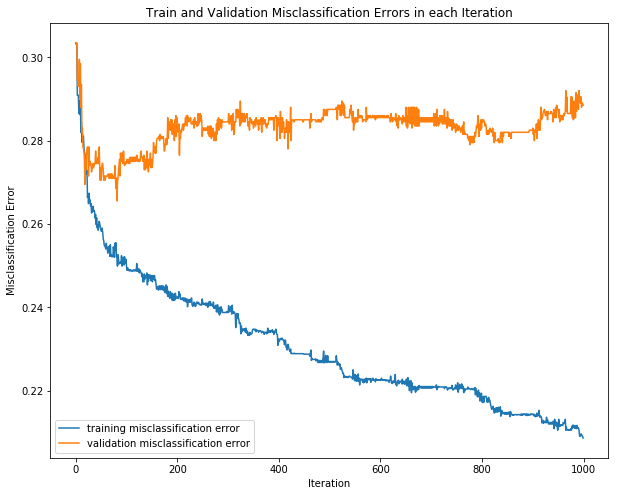

In [6]:



iterations = [i for i in range(1000)]
plt.figure(figsize=(10,8))
plt.title("Train and Validation Misclassification Errors in each Iteration")
plt.plot(iterations, line_search_train_misclassication_errors)
plt.plot(iterations, line_search_validation_misclassication_errors)
plt.legend(['training misclassification error', 'validation misclassification error'], loc='lower left')
plt.xlabel("Iteration")
plt.ylabel("Misclassification Error")
plt.show()

## epsilon Adaboost

In [7]:
def misclassification_error(y_hat, y):
    return np.sum(~np.equal(np.sign(y_hat), np.sign(y))) / len(y)

epsilon = 0.01

weights = np.repeat(1, n_train_samples)

boosted_train_predictions = np.repeat(0, n_train_samples)
boosted_validation_predictions = np.repeat(0, n_test_samples)

train_misclassication_errors = []
validation_misclassication_errors = []

for t in range(1000):
    tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
    tree.fit(X_train, y_train, sample_weight=weights)
    y_hat_t = tree.predict(X_train)

    err_t = np.sum(weights[~np.equal(np.sign(y_hat_t), np.sign(y_train))]) / np.sum(weights)
    alpha_t = np.sign(np.log((1-err_t)/err_t))*epsilon
    
    boosted_train_predictions = boosted_train_predictions + alpha_t*y_hat_t
    boosted_validation_predictions = boosted_validation_predictions + alpha_t*tree.predict(X_validation)
    
    weights = np.multiply(weights, np.exp(-alpha_t*np.multiply(y_hat_t, y_train)))
    weights = (weights / np.sum(weights))*n_train_samples

    train_misclassication_errors.append(misclassification_error(boosted_train_predictions, y_train))
    validation_misclassication_errors.append(misclassification_error(boosted_validation_predictions, y_validation))
    
    print("Train: ", train_misclassication_errors[-1], "Test: ", validation_misclassication_errors[-1])
    

Train:  0.30325 Test:  0.3035
Train:  0.383875 Test:  0.3945
Train:  0.30325 Test:  0.3035
Train:  0.383875 Test:  0.3945
Train:  0.3025 Test:  0.315
Train:  0.302375 Test:  0.315
Train:  0.302375 Test:  0.315
Train:  0.302375 Test:  0.315
Train:  0.302375 Test:  0.315
Train:  0.302375 Test:  0.315
Train:  0.30225 Test:  0.315
Train:  0.30225 Test:  0.315
Train:  0.30225 Test:  0.315
Train:  0.29275 Test:  0.305
Train:  0.30225 Test:  0.315
Train:  0.29275 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.29275 Test:  0.305
Train:  0.3025 Test:  0.315
Train:  0.293 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.293 Test:  0.305
Train:  0.29075 Test:  0.2985
Train:  0.29075 Test:  0.2985
Train:  0.291125 Test:  0.298
Train:  0.291125 Test:  0.298
Train:  0.289375 Test:  0.295
Train:  0.289625 Test:  0.2945
Train:  0.288 Test:  0.2935
Train:  0.290875 Test:  0.2955
Train:  0.28775 Test:  0.284
Train:  0.2

Train:  0.262625 Test:  0.275
Train:  0.262375 Test:  0.2765
Train:  0.26175 Test:  0.2745
Train:  0.262 Test:  0.2765
Train:  0.26225 Test:  0.275
Train:  0.2625 Test:  0.275
Train:  0.2615 Test:  0.274
Train:  0.261375 Test:  0.275
Train:  0.2615 Test:  0.2735
Train:  0.261125 Test:  0.275
Train:  0.26125 Test:  0.2735
Train:  0.261 Test:  0.275
Train:  0.26125 Test:  0.2735
Train:  0.26025 Test:  0.274
Train:  0.261 Test:  0.2735
Train:  0.260875 Test:  0.2745
Train:  0.261 Test:  0.2735
Train:  0.26075 Test:  0.2745
Train:  0.260875 Test:  0.2735
Train:  0.260875 Test:  0.2745
Train:  0.262 Test:  0.274
Train:  0.261 Test:  0.276
Train:  0.2605 Test:  0.2755
Train:  0.261 Test:  0.274
Train:  0.261375 Test:  0.2745
Train:  0.2595 Test:  0.272
Train:  0.260625 Test:  0.272
Train:  0.259625 Test:  0.2725
Train:  0.2605 Test:  0.2715
Train:  0.25925 Test:  0.2715
Train:  0.259375 Test:  0.2705
Train:  0.259 Test:  0.2725
Train:  0.25925 Test:  0.2705
Train:  0.259125 Test:  0.271
Trai

Train:  0.24775 Test:  0.2725
Train:  0.248 Test:  0.2725
Train:  0.247375 Test:  0.2735
Train:  0.24775 Test:  0.2725
Train:  0.247375 Test:  0.273
Train:  0.24775 Test:  0.272
Train:  0.24675 Test:  0.272
Train:  0.24775 Test:  0.2725
Train:  0.247125 Test:  0.2725
Train:  0.2485 Test:  0.2725
Train:  0.247375 Test:  0.2725
Train:  0.24875 Test:  0.272
Train:  0.247 Test:  0.2725
Train:  0.248125 Test:  0.271
Train:  0.247375 Test:  0.272
Train:  0.247875 Test:  0.271
Train:  0.2465 Test:  0.2735
Train:  0.24775 Test:  0.272
Train:  0.2465 Test:  0.2735
Train:  0.24775 Test:  0.272
Train:  0.246375 Test:  0.2735
Train:  0.24775 Test:  0.272
Train:  0.246125 Test:  0.2735
Train:  0.247375 Test:  0.2725
Train:  0.245125 Test:  0.275
Train:  0.24725 Test:  0.2725
Train:  0.245125 Test:  0.275
Train:  0.24725 Test:  0.2725
Train:  0.245625 Test:  0.275
Train:  0.24725 Test:  0.2735
Train:  0.245125 Test:  0.276
Train:  0.247125 Test:  0.2745
Train:  0.245 Test:  0.276
Train:  0.2465 Test

Train:  0.23425 Test:  0.274
Train:  0.236 Test:  0.2735
Train:  0.2345 Test:  0.2745
Train:  0.234625 Test:  0.2725
Train:  0.234625 Test:  0.275
Train:  0.236125 Test:  0.275
Train:  0.2345 Test:  0.2755
Train:  0.234625 Test:  0.2745
Train:  0.2345 Test:  0.276
Train:  0.234875 Test:  0.2745
Train:  0.2345 Test:  0.276
Train:  0.234875 Test:  0.274
Train:  0.23425 Test:  0.276
Train:  0.234625 Test:  0.274
Train:  0.235125 Test:  0.2745
Train:  0.235 Test:  0.271
Train:  0.233875 Test:  0.2755
Train:  0.23475 Test:  0.2765
Train:  0.233875 Test:  0.2745
Train:  0.2345 Test:  0.2765
Train:  0.233875 Test:  0.274
Train:  0.234875 Test:  0.272
Train:  0.23375 Test:  0.274
Train:  0.234375 Test:  0.2745
Train:  0.2325 Test:  0.274
Train:  0.232375 Test:  0.274
Train:  0.23225 Test:  0.2755
Train:  0.232875 Test:  0.274
Train:  0.232125 Test:  0.275
Train:  0.233 Test:  0.2735
Train:  0.232625 Test:  0.275
Train:  0.233375 Test:  0.2755
Train:  0.232375 Test:  0.275
Train:  0.233 Test:  

In [8]:
epsilon_train_misclassication_errors = train_misclassication_errors
epsilon_validation_misclassication_errors = validation_misclassication_errors

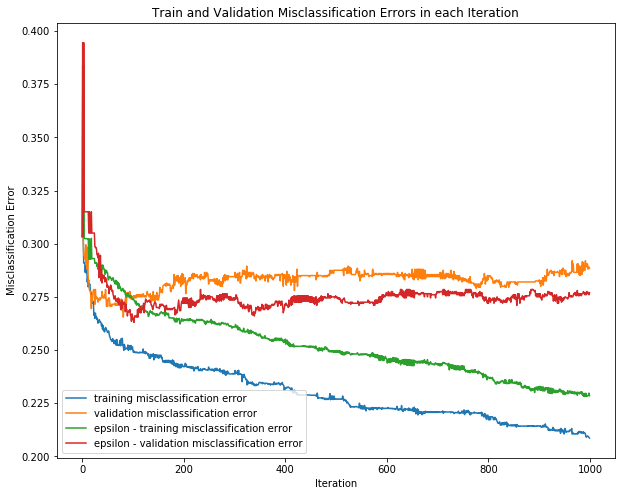

In [9]:
iterations = [i for i in range(1000)]
plt.figure(figsize=(10,8))
plt.title("Train and Validation Misclassification Errors in each Iteration")
plt.plot(iterations, line_search_train_misclassication_errors)
plt.plot(iterations, line_search_validation_misclassication_errors)
plt.plot(iterations, epsilon_train_misclassication_errors)
plt.plot(iterations, epsilon_validation_misclassication_errors)
plt.legend(['training misclassification error', 'validation misclassification error', 'epsilon - training misclassification error', 'epsilon - validation misclassification error'], loc='lower left')
plt.xlabel("Iteration")
plt.ylabel("Misclassification Error")
plt.show()

## Regression Approach

In [18]:
def misclassification_error(y_hat, y):
    return np.sum(~np.equal(np.sign(y_hat), np.sign(y))) / len(y)

weights = np.repeat(1, n_train_samples)

boosted_train_predictions = np.repeat(0, n_train_samples)
boosted_validation_predictions = np.repeat(0, n_test_samples)

train_misclassication_errors = []
validation_misclassication_errors = []

target = y_train

for t in range(1000):
    
    tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)
    tree.fit(X_train, target)
    y_hat_t = tree.predict(X_train)
    alpha_t = epsilon
    
    boosted_train_predictions = boosted_train_predictions + alpha_t*y_hat_t
    boosted_validation_predictions = boosted_validation_predictions + alpha_t*tree.predict(X_validation)

    target = y_train - boosted_train_predictions
    
    train_misclassication_errors.append(misclassification_error(boosted_train_predictions, y_train))
    validation_misclassication_errors.append(misclassification_error(boosted_validation_predictions, y_validation))
    
    print("Train: ", train_misclassication_errors[-1], "Test: ", validation_misclassication_errors[-1])
    

Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.30325 Test:  0.3035
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.308375 Test:  0.315
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.3025 Test:  0.315
Train:  0.30225 Test:  0.315
Train:  0.299875 Test:  0.3095
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055
Train:  0.299875 Test:  0.3055

Train:  0.2765 Test:  0.2715
Train:  0.276125 Test:  0.271
Train:  0.275875 Test:  0.2715
Train:  0.276 Test:  0.2715
Train:  0.275875 Test:  0.2715
Train:  0.276 Test:  0.2715
Train:  0.275625 Test:  0.271
Train:  0.275375 Test:  0.2715
Train:  0.275375 Test:  0.272
Train:  0.27525 Test:  0.272
Train:  0.275375 Test:  0.272
Train:  0.275125 Test:  0.2715
Train:  0.275 Test:  0.271
Train:  0.274875 Test:  0.27
Train:  0.274875 Test:  0.27
Train:  0.274625 Test:  0.27
Train:  0.2745 Test:  0.2705
Train:  0.2745 Test:  0.27
Train:  0.274375 Test:  0.2705
Train:  0.27425 Test:  0.271
Train:  0.274625 Test:  0.271
Train:  0.274125 Test:  0.2705
Train:  0.274 Test:  0.271
Train:  0.27425 Test:  0.269
Train:  0.273875 Test:  0.2695
Train:  0.27375 Test:  0.27
Train:  0.27375 Test:  0.2695
Train:  0.273875 Test:  0.2695
Train:  0.2735 Test:  0.27
Train:  0.273875 Test:  0.2695
Train:  0.273875 Test:  0.2695
Train:  0.273875 Test:  0.2695
Train:  0.273875 Test:  0.27
Train:  0.273375 Test:  0.

Train:  0.263 Test:  0.2695
Train:  0.262875 Test:  0.27
Train:  0.262875 Test:  0.2695
Train:  0.262875 Test:  0.2695
Train:  0.263 Test:  0.27
Train:  0.263 Test:  0.27
Train:  0.262875 Test:  0.2695
Train:  0.263125 Test:  0.2695
Train:  0.262875 Test:  0.2695
Train:  0.263 Test:  0.269
Train:  0.263 Test:  0.2695
Train:  0.262625 Test:  0.2695
Train:  0.26275 Test:  0.2695
Train:  0.262625 Test:  0.2695
Train:  0.26275 Test:  0.2695
Train:  0.262875 Test:  0.2695
Train:  0.262875 Test:  0.2685
Train:  0.262625 Test:  0.2705
Train:  0.262625 Test:  0.27
Train:  0.2625 Test:  0.269
Train:  0.262375 Test:  0.2695
Train:  0.2625 Test:  0.2695
Train:  0.262375 Test:  0.2695
Train:  0.26225 Test:  0.2695
Train:  0.26225 Test:  0.2695
Train:  0.26225 Test:  0.2695
Train:  0.26225 Test:  0.27
Train:  0.262125 Test:  0.2705
Train:  0.26225 Test:  0.271
Train:  0.26225 Test:  0.2705
Train:  0.26225 Test:  0.2715
Train:  0.262 Test:  0.271
Train:  0.26225 Test:  0.2705
Train:  0.26225 Test:  

Train:  0.25875 Test:  0.2715
Train:  0.2585 Test:  0.2715
Train:  0.2585 Test:  0.2715
Train:  0.2585 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.258625 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.258375 Test:  0.272
Train:  0.258625 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.2585 Test:  0.272
Train:  0.258125 Test:  0.272
Train:  0.25825 Test:  0.272
Train:  0.25825 Test:  0.272
Train:  0.258375 Test:  0.2725
Train:  0.258375 Test:  0.272
Train:  0.25825 Test:  0.272
Train:  0.258125 Test:  0.272
Train:  0.258 Test:  0.2715
Train:  0.258 Test:  0.272
Train:  0.258 Test:  0.272
Train:  0.257875 Test:  0.2725
Train:  0.257875 Test:  0.2725
Train:  0.258 Test:  0.272
Train:  0.258125 Test:  0.272
Train:  0.257875 Test:  0.2725
Train:  0.257875 Test:  0.272
Train:  0.257875 Test:  0.272
Train:  0.25775 Test:  0.272
Train:  0.257875 Test:  0.2715
Train:  0.25775 Test:  0.271
Train:  0.257625 Test:  0.2705
Train:

In [19]:
regressor_train_misclassication_errors = train_misclassication_errors
regressor_validation_misclassication_errors = validation_misclassication_errors

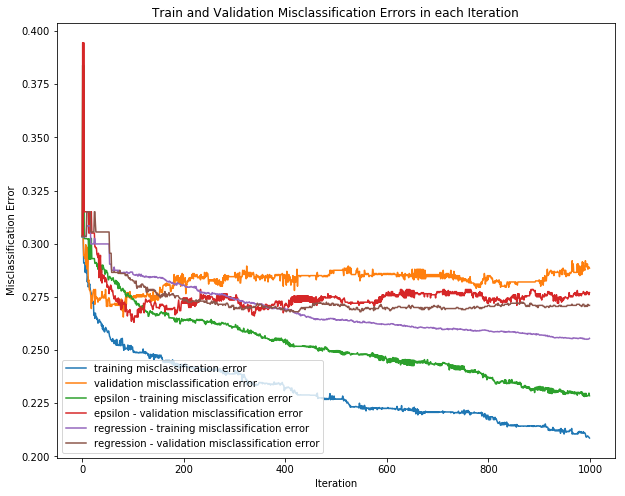

In [20]:
iterations = [i for i in range(1000)]
plt.figure(figsize=(10,8))
plt.title("Train and Validation Misclassification Errors in each Iteration")
plt.plot(iterations, line_search_train_misclassication_errors)
plt.plot(iterations, line_search_validation_misclassication_errors)
plt.plot(iterations, epsilon_train_misclassication_errors)
plt.plot(iterations, epsilon_validation_misclassication_errors)
plt.plot(iterations, regressor_train_misclassication_errors)
plt.plot(iterations, regressor_validation_misclassication_errors)
plt.legend(['training misclassification error', 
            'validation misclassification error', 
            'epsilon - training misclassification error', 
            'epsilon - validation misclassification error',
            'regression - training misclassification error', 
            'regression - validation misclassification error'
           ], loc='lower left')
plt.xlabel("Iteration")
plt.ylabel("Misclassification Error")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
def misclassification_error(y_hat, y):
    return np.sum(~np.equal(np.sign(y_hat), np.sign(y))) / len(y)

weights = np.repeat(1, n_train_samples)

boosted_train_predictions = np.repeat(0, n_train_samples)
boosted_validation_predictions = np.repeat(0, n_test_samples)

train_misclassication_errors = []
validation_misclassication_errors = []

target = y_train

for t in range(1000):
    
    tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)
    tree.fit(X_train, target)
    y_hat_t = tree.predict(X_train)
    alpha_t = epsilon
    
    boosted_train_predictions = boosted_train_predictions + alpha_t*y_hat_t
    boosted_validation_predictions = boosted_validation_predictions + alpha_t*tree.predict(X_validation)

    target = y_train - boosted_train_predictions
    
    train_misclassication_errors.append(misclassification_error(boosted_train_predictions, y_train))
    validation_misclassication_errors.append(misclassification_error(boosted_validation_predictions, y_validation))
    
    print("Train: ", train_misclassication_errors[-1], "Test: ", validation_misclassication_errors[-1])

Iteration:  0 Train:  0.30625 Test:  0.3035
Iteration:  1 Train:  0.27975 Test:  0.291
Iteration:  2 Train:  0.27425 Test:  0.2835
Iteration:  3 Train:  0.27625 Test:  0.28
Iteration:  4 Train:  0.27525 Test:  0.281
Iteration:  5 Train:  0.276 Test:  0.281
Iteration:  6 Train:  0.273125 Test:  0.28
Iteration:  7 Train:  0.270125 Test:  0.2795
Iteration:  8 Train:  0.273 Test:  0.2765
Iteration:  9 Train:  0.269875 Test:  0.277
Iteration:  10 Train:  0.269875 Test:  0.2755
Iteration:  11 Train:  0.268 Test:  0.2755
Iteration:  12 Train:  0.268125 Test:  0.2745
Iteration:  13 Train:  0.267375 Test:  0.2765
Iteration:  14 Train:  0.268875 Test:  0.277
Iteration:  15 Train:  0.269375 Test:  0.276
Iteration:  16 Train:  0.267875 Test:  0.2775
Iteration:  17 Train:  0.265625 Test:  0.274
Iteration:  18 Train:  0.264625 Test:  0.2745
Iteration:  19 Train:  0.263375 Test:  0.271
Iteration:  20 Train:  0.261875 Test:  0.271
Iteration:  21 Train:  0.26375 Test:  0.2695
Iteration:  22 Train:  0.2

Iteration:  183 Train:  0.23625 Test:  0.2725
Iteration:  184 Train:  0.23625 Test:  0.2725
Iteration:  185 Train:  0.23675 Test:  0.2725
Iteration:  186 Train:  0.23575 Test:  0.2725
Iteration:  187 Train:  0.235375 Test:  0.2725
Iteration:  188 Train:  0.23525 Test:  0.2725
Iteration:  189 Train:  0.235875 Test:  0.2725
Iteration:  190 Train:  0.2355 Test:  0.273
Iteration:  191 Train:  0.23525 Test:  0.273
Iteration:  192 Train:  0.2355 Test:  0.273
Iteration:  193 Train:  0.235 Test:  0.2735
Iteration:  194 Train:  0.23475 Test:  0.273
Iteration:  195 Train:  0.234875 Test:  0.273
Iteration:  196 Train:  0.23475 Test:  0.273
Iteration:  197 Train:  0.234625 Test:  0.2725
Iteration:  198 Train:  0.23375 Test:  0.2735
Iteration:  199 Train:  0.234125 Test:  0.2735
Iteration:  200 Train:  0.23375 Test:  0.273
Iteration:  201 Train:  0.23375 Test:  0.274
Iteration:  202 Train:  0.233875 Test:  0.274
Iteration:  203 Train:  0.23375 Test:  0.274
Iteration:  204 Train:  0.2335 Test:  0.27

Iteration:  364 Train:  0.21475 Test:  0.273
Iteration:  365 Train:  0.21425 Test:  0.2715
Iteration:  366 Train:  0.214375 Test:  0.2715
Iteration:  367 Train:  0.21425 Test:  0.2715
Iteration:  368 Train:  0.21375 Test:  0.2715
Iteration:  369 Train:  0.214 Test:  0.2725
Iteration:  370 Train:  0.213875 Test:  0.2725
Iteration:  371 Train:  0.214125 Test:  0.271
Iteration:  372 Train:  0.213875 Test:  0.271
Iteration:  373 Train:  0.213875 Test:  0.2715
Iteration:  374 Train:  0.213875 Test:  0.2715
Iteration:  375 Train:  0.21375 Test:  0.2715
Iteration:  376 Train:  0.21375 Test:  0.271
Iteration:  377 Train:  0.21325 Test:  0.2715
Iteration:  378 Train:  0.213125 Test:  0.272
Iteration:  379 Train:  0.212875 Test:  0.2715
Iteration:  380 Train:  0.21275 Test:  0.272
Iteration:  381 Train:  0.212625 Test:  0.2725
Iteration:  382 Train:  0.21275 Test:  0.2725
Iteration:  383 Train:  0.212625 Test:  0.2725
Iteration:  384 Train:  0.212625 Test:  0.273
Iteration:  385 Train:  0.212375

Iteration:  546 Train:  0.196375 Test:  0.27
Iteration:  547 Train:  0.19625 Test:  0.27
Iteration:  548 Train:  0.1965 Test:  0.27
Iteration:  549 Train:  0.196125 Test:  0.2695
Iteration:  550 Train:  0.196375 Test:  0.269
Iteration:  551 Train:  0.196125 Test:  0.269
Iteration:  552 Train:  0.1965 Test:  0.269
Iteration:  553 Train:  0.196375 Test:  0.269
Iteration:  554 Train:  0.196125 Test:  0.269
Iteration:  555 Train:  0.19575 Test:  0.269
Iteration:  556 Train:  0.1955 Test:  0.269
Iteration:  557 Train:  0.195375 Test:  0.269
Iteration:  558 Train:  0.195125 Test:  0.269
Iteration:  559 Train:  0.195125 Test:  0.269
Iteration:  560 Train:  0.195 Test:  0.2685
Iteration:  561 Train:  0.194375 Test:  0.2685
Iteration:  562 Train:  0.194875 Test:  0.2685
Iteration:  563 Train:  0.19525 Test:  0.268
Iteration:  564 Train:  0.195 Test:  0.269
Iteration:  565 Train:  0.194375 Test:  0.2685
Iteration:  566 Train:  0.194625 Test:  0.269
Iteration:  567 Train:  0.194375 Test:  0.2695


Iteration:  728 Train:  0.181 Test:  0.267
Iteration:  729 Train:  0.181 Test:  0.267
Iteration:  730 Train:  0.181 Test:  0.267
Iteration:  731 Train:  0.18075 Test:  0.2665
Iteration:  732 Train:  0.18075 Test:  0.2665
Iteration:  733 Train:  0.180875 Test:  0.267
Iteration:  734 Train:  0.18025 Test:  0.2665
Iteration:  735 Train:  0.18025 Test:  0.2665
Iteration:  736 Train:  0.18 Test:  0.2665
Iteration:  737 Train:  0.18 Test:  0.2665
Iteration:  738 Train:  0.179875 Test:  0.2665
Iteration:  739 Train:  0.180125 Test:  0.2665
Iteration:  740 Train:  0.18 Test:  0.2665
Iteration:  741 Train:  0.18 Test:  0.2665
Iteration:  742 Train:  0.179875 Test:  0.2665
Iteration:  743 Train:  0.17975 Test:  0.2655
Iteration:  744 Train:  0.17975 Test:  0.2655
Iteration:  745 Train:  0.17975 Test:  0.2655
Iteration:  746 Train:  0.179625 Test:  0.267
Iteration:  747 Train:  0.17975 Test:  0.267
Iteration:  748 Train:  0.179875 Test:  0.267
Iteration:  749 Train:  0.1795 Test:  0.2665
Iteratio

Iteration:  908 Train:  0.169 Test:  0.2695
Iteration:  909 Train:  0.168875 Test:  0.269
Iteration:  910 Train:  0.16875 Test:  0.269
Iteration:  911 Train:  0.16875 Test:  0.269
Iteration:  912 Train:  0.16875 Test:  0.269
Iteration:  913 Train:  0.16875 Test:  0.269
Iteration:  914 Train:  0.169 Test:  0.269
Iteration:  915 Train:  0.169125 Test:  0.269
Iteration:  916 Train:  0.168875 Test:  0.2685
Iteration:  917 Train:  0.168625 Test:  0.2695
Iteration:  918 Train:  0.168875 Test:  0.2695
Iteration:  919 Train:  0.16875 Test:  0.269
Iteration:  920 Train:  0.168625 Test:  0.2685
Iteration:  921 Train:  0.1685 Test:  0.269
Iteration:  922 Train:  0.1685 Test:  0.2695
Iteration:  923 Train:  0.1685 Test:  0.27
Iteration:  924 Train:  0.1685 Test:  0.2685
Iteration:  925 Train:  0.168375 Test:  0.2695
Iteration:  926 Train:  0.168375 Test:  0.2695
Iteration:  927 Train:  0.168375 Test:  0.269
Iteration:  928 Train:  0.168375 Test:  0.2695
Iteration:  929 Train:  0.168125 Test:  0.26

In [15]:
my_train_misclassication_errors = train_misclassication_errors
my_validation_misclassication_errors = validation_misclassication_errors

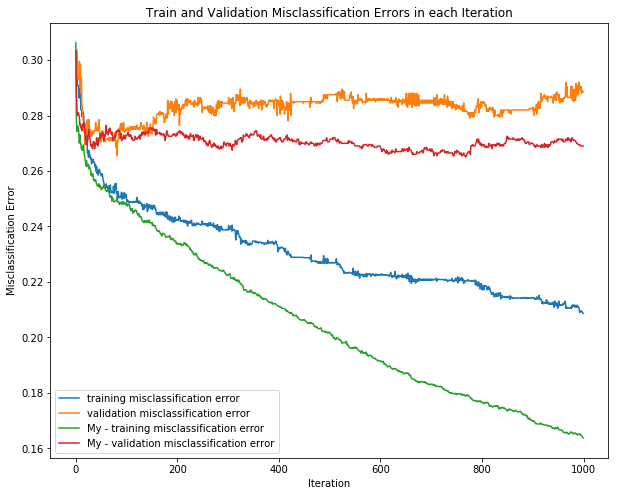

In [16]:
iterations = [i for i in range(1000)]
plt.figure(figsize=(10,8))
plt.title("Train and Validation Misclassification Errors in each Iteration")
plt.plot(iterations, line_search_train_misclassication_errors)
plt.plot(iterations, line_search_validation_misclassication_errors)
plt.plot(iterations, my_train_misclassication_errors)
plt.plot(iterations, my_validation_misclassication_errors)
plt.legend(['training misclassification error', 'validation misclassification error', 'My - training misclassification error', 'My - validation misclassification error'], loc='lower left')
plt.xlabel("Iteration")
plt.ylabel("Misclassification Error")
plt.show()

In [17]:
np.random.choice([1,2,3,4,5,6])

3